In [1]:
import random
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

In [153]:
#function to sample from poisson 1 time
def poisson(target_time, rate):
    i = 0
    events = -1
    #we simply accumulate exponentially sampled amounts of time
    while i < target_time:
        i += np.random.exponential(1 / rate)
        events += 1 #after each sample we increment number of events
    return events
#function to sample from poisson n times
def n_poisson(n, target_time, rate):
    event_table = np.array([])
    for iterations in range(n):
        event_table = np.append(event_table, poisson(target_time, rate))
    return event_table

In [154]:
#define our hyperparameters and functions to convert them to posterior parameters
alpha = 5
beta = 1
def get_shape(alpha, data):
    return alpha + np.sum(data)
def get_scale(beta, data):
    return 1/((1/beta) + len(data))

It would be possible to construct a likelihood for n data points by taking the product of the Poisson distribution equation for each data point, then multiplying that likelihood by the gamma distribution prior to get some gamma distribution for the posterior. The issue is finding a wieldy way to construct a function like that in Python.. maybe using higher order functions and/or recursion is necessary here. Analytically, however, we can simply convert the parameters using the above functions.

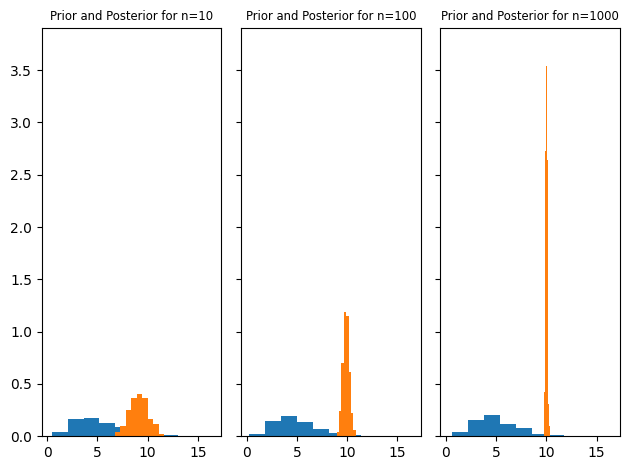

In [156]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, sharex=True)

#plot a prior and posterior for the first 10, 100, and 1000 data points
data = n_poisson(1000, 1, 10)

title = axs[0].set_title("Prior and Posterior for n=10", size="small")
plot = axs[0].hist(np.random.gamma(alpha, scale=beta, size=1000), density=True)
plot = axs[0].hist(np.random.gamma(get_shape(alpha, data[0:10]), scale=get_scale(beta, data[0:10]), size=1000), density=True)

title = axs[1].set_title("Prior and Posterior for n=100", size="small")
plot = axs[1].hist(np.random.gamma(alpha, scale=beta, size=1000), density=True)
plot = axs[1].hist(np.random.gamma(get_shape(alpha, data[0:100]), scale=get_scale(beta, data[0:100]), size=1000), density=True)

title = axs[2].set_title("Prior and Posterior for n=1000", size="small")
plot = axs[2].hist(np.random.gamma(alpha, scale=beta, size=1000), density=True)
plot = axs[2].hist(np.random.gamma(get_shape(alpha, data), scale=get_scale(beta, data), size=1000), density=True)